### Player rating: Self-Comparisoin

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data_2021 = pd.read_csv('test_data/2021_fantasy_scores.csv')
data_2020 = pd.read_csv('test_data/2020_fantasy_scores.csv')
data_2021 = data_2021[['player_name','player_id','matchup','game_date','fantasy_score','fantasy_score_cumul']]
data_2020 = data_2020[['player_name','player_id','matchup','game_date','fantasy_score','fantasy_score_cumul']]

data = pd.concat([data_2020, data_2021])
data = data.sort_values(by=['player_id','game_date']).reset_index(drop=True)

In [3]:
# expensive code atm. need to refactor using numpy arrays or regular lists
def n_game_avg(row, n=10):
    n_games = (data.loc[(data['game_date'] < row['game_date']) & (data['player_id'] == row['player_id'])]
                   .sort_values(by='game_date', ascending = False)
                   .head(n))
    return np.mean(n_games['fantasy_score'])

In [4]:
data_2021['10_game_avg'] = data_2021.apply(lambda x: n_game_avg(x), axis=1)

Player:  rudy gobert


<AxesSubplot:xlabel='game_date', ylabel='10_game_avg'>

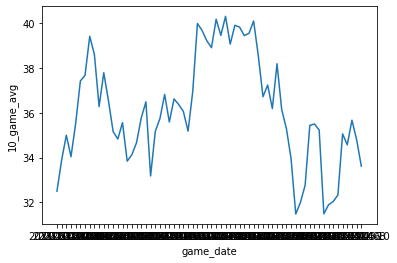

In [31]:
inp = input('Player: ').lower()
plot = data_2021.loc[data_2021.player_name.str.lower() == inp]
sns.lineplot(data=plot, x=plot['game_date'], y=plot['10_game_avg'])